## Single node perturbation analysis

This notebook contains the code for performing the perturbation (activating or inhibiting) of all nodes of the model.

## 0) Import libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import maboss
import time
import datetime

## 1) Load the model & run simulations with no perturbations (WT)

In [2]:
file = "data/model_files/PsoriaSys"

bnd_file = file+".bnd"
cfg_file = file+".cfg"
upp_file = file+".upp"

model_init = maboss.load(bnd_file,cfg_file)

sim_init = maboss.UpdatePopulation(model_init,upp_file)

In [3]:
%time res_init = sim_init.run(cmaboss = True)

CPU times: user 14min 17s, sys: 35.2 s, total: 14min 52s
Wall time: 14min 52s


In [4]:
table_init = res_init.get_nodes_stepwise_probability_distribution(['KC', 'LC', 'aKC', 'Prol_KC', 'Diff_KC', 'preDiff_KC', 'pDC', 'iDC', 'M1', 'M2', 'Neutrophil', 'Th0', 'Th1', 'Th2', 'Th17', 'Th22', 'Treg', 'Fibroblast','ILC3', 'Division', 'Death'])

In [5]:
table_init

,PopRatio,KC,LC,aKC,Prol_KC,Diff_KC,preDiff_KC,pDC,iDC,M1,M2,Neutrophil,Th0,Th1,Th2,Th17,Th22,Treg,Fibroblast,ILC3,Division,Death
0,1.000000,0.704773,0.235481,0.212475,0.0,0.000316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.168127,0.0,0.0,0.000000,0.000000
1,1.000000,0.698122,0.490444,0.618031,0.0,0.001171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.123265,0.0,0.0,0.000000,0.000000
2,1.000000,0.694592,0.618193,0.818814,0.0,0.002712,0.000000,0.000804,0.000816,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.121740,0.0,0.0,0.000000,0.000000
3,1.000000,0.689228,0.674067,0.914903,0.0,0.003509,0.000000,0.003966,0.003951,0.000015,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.132595,0.0,0.0,0.000000,0.000000
4,1.000000,0.681746,0.701968,0.955532,0.0,0.004105,0.000000,0.010269,0.010262,0.000203,0.000000,0.000189,0.0,0.000000,0.0,0.000000,0.000000,0.144594,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,2.218626,0.028651,0.092068,1.000000,1.0,0.011350,0.507105,0.996543,1.000000,0.995000,0.005000,1.000000,1.0,0.995000,0.0,0.995000,0.995000,0.096139,1.0,1.0,0.004250,0.002336
597,2.222837,0.027828,0.089047,1.000000,1.0,0.009968,0.509875,0.996482,1.000000,0.994933,0.005067,1.000000,1.0,0.994933,0.0,0.994933,0.994933,0.093323,1.0,1.0,0.004811,0.003031
598,2.226647,0.029408,0.090635,1.000000,1.0,0.010399,0.510241,0.996568,1.000000,0.994667,0.005333,1.000000,1.0,0.994667,0.0,0.994667,0.994667,0.095345,1.0,1.0,0.004645,0.002378
599,2.231546,0.029467,0.087774,1.000000,1.0,0.010286,0.506939,0.996451,1.000000,0.994200,0.005800,1.000000,1.0,0.994200,0.0,0.994200,0.994200,0.093271,1.0,1.0,0.005976,0.002694


In [6]:
table_init.to_csv('output/WT_model_trajectories/WT_trajectories_300steps.csv')

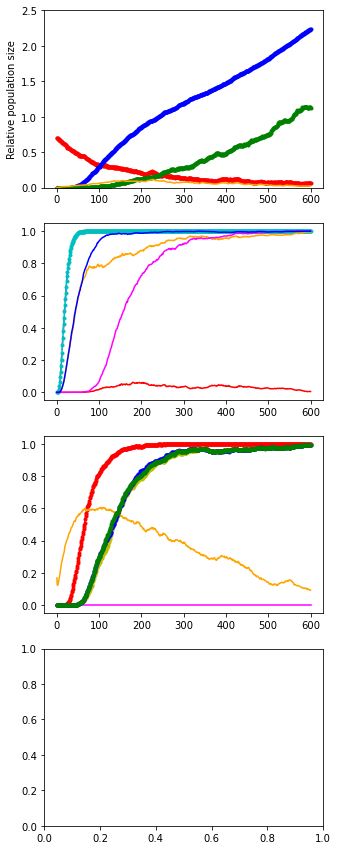

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5, 15))

axes[0].plot(table_init['PopRatio']*table_init['KC'],'.-r',label="Normal KC")
axes[0].plot(table_init['PopRatio']*table_init['Prol_KC'],'.-b',label="Proliferating KC")
axes[0].plot(table_init['PopRatio']*table_init['preDiff_KC'],'.-g',label="Predifferentiated KC")
axes[0].plot(table_init['PopRatio']*table_init['Diff_KC'],'orange',label="Terminally differentiated KC")
axes[0].set_ylim([0, 2.5])
axes[0].set_ylabel('Relative population size')

axes[1].plot(table_init['pDC'],'-.m',label="pDC")
axes[1].plot(table_init['iDC'],'.-c',label="DendriticCell")
axes[1].plot(table_init['M1'],'orange', label="M1 Macrophage")
axes[1].plot(table_init['M2'],'red', label="M2 Macrophage")
axes[1].plot(table_init['Fibroblast'],'magenta', label="Fibroblast")
axes[1].plot(table_init['Neutrophil'],'blue', label="Neutrophil")

axes[2].plot(table_init['Th0'],'.-r',label="Th0")
axes[2].plot(table_init['Treg'],'orange',label="Treg")
axes[2].plot(table_init['Th1'],'.-y',label="Th1")
axes[2].plot(table_init['Th2'],'magenta',label="Th2")
axes[2].plot(table_init['Th17'],'.-b',label="Th17")
axes[2].plot(table_init['Th22'],'.-g',label="Th22")

#axes[3].plot(table_init['CTLA4'],'.-r',label="CTLA4")
#axes[3].plot(table_init['CD28'],'orange',label="CD28")
#axes[3].plot(table_init['Th0'],'.-y',label="Th0")
#axes[3].plot(table_init['CD80'],'b',label="CD80")


Run additional analysis to simulate the effect of CTLA4 underexpression

In [ ]:
model_per = maboss.load(bnd_file,cfg_file)

sim_CTLA4 = maboss.UpdatePopulation(model_per, upp_file)
res_CTLA4 = sim_CTLA4.run(cmaboss = True)
table_CTLA4 = res_CTLA4.get_nodes_stepwise_probability_distribution(['KC', 'LC', 'aKC', 'Prol_KC', 'Diff_KC', 'preDiff_KC', 'pDC', 'iDC', 'M1', 'M2', 'Neutrophil', 'Th0', 'Th1', 'Th2', 'Th17', 'Th22', 'Treg', 'Fibroblast', 'Division', 'Death'])
table_CTLA4

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5, 15))

axes[0].plot(table_CTLA4['PopRatio']*table_CTLA4['KC'],'.-r',label="Normal KC")
axes[0].plot(table_CTLA4['PopRatio']*table_CTLA4['Prol_KC'],'.-b',label="Proliferating KC")
axes[0].plot(table_CTLA4['PopRatio']*table_CTLA4['preDiff_KC'],'.-g',label="Predifferentiated KC")
axes[0].plot(table_CTLA4['PopRatio']*table_CTLA4['Diff_KC'],'orange',label="Terminally differentiated KC")
axes[0].set_ylim([0, 2.5])
axes[0].set_ylabel('Relative population size')

axes[1].plot(table_CTLA4['pDC'],'-.m',label="pDC")
axes[1].plot(table_CTLA4['iDC'],'.-c',label="DendriticCell")
axes[1].plot(table_CTLA4['M1'],'orange', label="M1 Macrophage")
axes[1].plot(table_CTLA4['M2'],'red', label="M2 Macrophage")
axes[1].plot(table_CTLA4['Fibroblast'],'magenta', label="Fibroblast")
axes[1].plot(table_CTLA4['Neutrophil'],'blue', label="Neutrophil")

axes[2].plot(table_CTLA4['Th0'],'.-r',label="Th0")
axes[2].plot(table_CTLA4['Treg'],'orange',label="Treg")
axes[2].plot(table_CTLA4['Th1'],'.-y',label="Th1")
axes[2].plot(table_CTLA4['Th2'],'magenta',label="Th2")
axes[2].plot(table_CTLA4['Th17'],'.-b',label="Th17")
axes[2].plot(table_CTLA4['Th22'],'.-g',label="Th22")

axes[3].plot(table_CTLA4['CTLA4'],'.-r',label="CTLA4")
axes[3].plot(table_CTLA4['CD28'],'orange',label="CD28")
axes[3].plot(table_CTLA4['Th0'],'.-y',label="Th0")
axes[3].plot(table_CTLA4['CD80'],'b',label="CD80")

table_CTLA4.to_csv('output/CTLA4_effect/traj_CTLA4.csv')

## 2) Perform single perturbations

For this set of simulations, the states of the WT model are used as the initial states for the perturbation. In the context of the disease, the first simulations aim to "force" the system into a psoriatic state and the second simulation mimics the effect of a perturbation/drug on an active psoriasis.

In [13]:
inhibitory_perturbations = ['LL37_Nucl','IL1b','IL6','IL12','IL17','IL19','IL22','IL23','IL36',
'IFNa','IFNg','CCL20','TNFa','CXCL8','TGFb','CD109','KGF','AMPs','PGE2','LTB4','BLT1','EP4','EP2','TLR7',
'TLR4','IL22R','IL17R','IFNGR','IFNAR','IL23R','IL12R','TNFAR','TGFBR','IL6R','IL1R','CCR6','CXCR2','IL19R',
'IL1RL2','KGFR','RORgamma','STAT3','STAT6','Tbet','FOXP3','AhR','NFKBIZ','NFKB1_Rela','NFKB1_hd',
'TYK2','STAT1','IRF7','TRAF3IP2','CEBPB','CREB1','CD28','CD80']

activating_perturbations = ["IL10",'IL4','IL10R','IL4R','GATA3','CTLA4','ALX','LXs']

In [ ]:
'''Define dictionaries to store attractors for each perturbation'''
trajectory_list = {}

for p_act in activating_perturbations:
    
    file = "data/model_files/PsoriaSys"

    bnd_file = file+".bnd"
    cfg_file = file+".cfg"
    upp_file = file+".upp"

    model_per = maboss.load(bnd_file,cfg_file)
    model_p = model_per.copy()
    model_p.mutate(p_act,"ON")
    
    sim_p = maboss.UpdatePopulation(model_p, upp_file, previous_run = res_init)
    res_p = sim_p.run(cmaboss = True)
    table_p = res_p.get_nodes_stepwise_probability_distribution(['KC', 'LC', 'aKC', 'Prol_KC', 'Diff_KC', 'preDiff_KC', 'pDC', 'iDC', 'M1', 'M2', 'Neutrophil', 'Th0', 'Th1', 'Th2', 'Th17', 'Th22', 'Treg', 'Fibroblast', 'Division', 'Death'])
    trajectory_list[p_act] = table_p
    print("Done for " + p_act)
    table_p.to_csv('output/Perturbation_analysis/'+p_act+'_ON.csv')
    
for p_inh in inhibitory_perturbations:
    
    file = "data/model_files/PsoriaSys"

    bnd_file = file+".bnd"
    cfg_file = file+".cfg"
    upp_file = file+".upp"

    model_per = maboss.load(bnd_file,cfg_file)
    model_p = model_per.copy()
    model_p.mutate(p_inh,"OFF")
    
    sim_p = maboss.UpdatePopulation(model_p, upp_file, previous_run = res_init)
    res_p = sim_p.run(cmaboss = True)
    table_p = res_p.get_nodes_stepwise_probability_distribution(['KC', 'LC', 'aKC', 'Prol_KC', 'Diff_KC', 'preDiff_KC', 'pDC', 'iDC', 'M1', 'M2', 'Neutrophil', 'Th0', 'Th1', 'Th2', 'Th17', 'Th22', 'Treg', 'Fibroblast', 'Division', 'Death'])
    trajectory_list[p_inh] = table_p
    print("Done for " + p_inh)
    table_p.to_csv('output/Perturbation_analysis/'+ p_inh+'_OFF.csv')

Done for IL10
Done for IL4
Done for IL10R
Done for IL4R
Done for GATA3
Done for CTLA4
Done for ALX
Done for LXs
Done for LL37_Nucl
Done for IL1b
Done for IL6
Done for IL12
Done for IL17
Done for IL19
Done for IL22
Done for IL23
Done for IL36
Done for IFNa
Done for IFNg
Done for CCL20
Done for TNFa
Done for CXCL8
Done for TGFb
Done for CD109
Done for KGF
Done for AMPs
Done for PGE2
Done for LTB4
Done for BLT1
Done for EP4
Done for EP2
Done for TLR7
Done for TLR4
Done for IL22R
Done for IL17R
Done for IFNGR
Done for IFNAR
Done for IL23R
Done for IL12R
Done for TNFAR
Done for TGFBR
Done for IL6R
Done for IL1R
Done for CCR6
Done for CXCR2
Done for IL19R
Done for IL1RL2
Done for KGFR
Done for RORgamma
Done for STAT3
Done for STAT6


## 3) Additional simulations

## Neutrophil inhibition 

In [ ]:
file = "data/model_files/PsoriaSys"

bnd_file = file+".bnd"
cfg_file = file+".cfg"
upp_file = file+".upp"

model_per = maboss.load(bnd_file,cfg_file)

model_neutrophil = model_per.copy()
model_neutrophil.mutate("Neutrophil","OFF")

sim_neutrophil = maboss.UpdatePopulation(model_neutrophil, upp_file, previous_run = res_init)
res_neutrophil = sim_neutrophil.run(cmaboss = True)
table_neutrophil = res_neutrophil.get_nodes_stepwise_probability_distribution(['KC', 'LC', 'aKC', 'Prol_KC', 'Diff_KC', 'preDiff_KC', 'pDC', 'iDC', 'M1', 'M2', 'Neutrophil', 'Th0', 'Th1', 'Th2', 'Th17', 'Th22', 'Treg', 'Fibroblast', 'ILC3','Division', 'Death'])
table_neutrophil

In [ ]:
table_neutrophil.to_csv('output/Perturbation_analysis/Neutrophil_OFF.csv')

## Ustekinumab (IL-12 & IL-23 inhibition)

In [10]:
file = "data/model_files/PsoriaSys"

bnd_file = file+".bnd"
cfg_file = file+".cfg"
upp_file = file+".upp"

model_per = maboss.load(bnd_file,cfg_file)

model_ustekinumab = model_per.copy()
model_ustekinumab.mutate("IL12","OFF")
model_ustekinumab.mutate("IL23","OFF")

sim_ustekinumab = maboss.UpdatePopulation(model_ustekinumab, upp_file, previous_run = res_init)
res_ustekinumab = sim_ustekinumab.run(cmaboss = True)
table_ustekinumab = res_ustekinumab.get_nodes_stepwise_probability_distribution(['KC', 'LC', 'aKC', 'Prol_KC', 'Diff_KC', 'preDiff_KC', 'pDC', 'iDC', 'M1', 'M2', 'Neutrophil', 'Th0', 'Th1', 'Th2', 'Th17', 'Th22', 'Treg', 'Fibroblast', 'Division', 'Death'])
table_ustekinumab

,PopRatio,KC,LC,aKC,Prol_KC,Diff_KC,preDiff_KC,pDC,iDC,M1,M2,Neutrophil,Th0,Th1,Th2,Th17,Th22,Treg,Fibroblast,Division,Death
0,1.363350,0.053809,0.254104,1.0,0.934732,0.031604,0.199405,0.996730,1.0,0.946703,0.046067,0.990670,1.0,0.789392,0.0,0.788701,0.787103,0.289911,0.920695,0.008589,0.006276
1,1.366413,0.053742,0.251194,1.0,0.933981,0.031389,0.199527,0.996781,1.0,0.947887,0.045067,0.991389,1.0,0.540608,0.0,0.538038,0.534420,0.286927,0.920007,0.003595,0.002170
2,1.368361,0.053403,0.249827,1.0,0.936097,0.028120,0.204551,0.996612,1.0,0.949121,0.043867,0.991060,1.0,0.333853,0.0,0.335673,0.336977,0.283638,0.922266,0.003324,0.001904
3,1.370305,0.049535,0.244985,1.0,0.935689,0.028590,0.202256,0.996735,1.0,0.950590,0.041600,0.991026,1.0,0.197947,0.0,0.193263,0.198433,0.278551,0.922021,0.003120,0.002584
4,1.371040,0.048366,0.242739,1.0,0.936396,0.026332,0.201401,0.996820,1.0,0.949467,0.042667,0.990443,1.0,0.111920,0.0,0.110520,0.111222,0.277851,0.922421,0.002135,0.001976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1.589209,0.000000,0.067716,1.0,0.993317,0.000600,0.447537,0.996630,1.0,0.973067,0.026933,0.995800,1.0,0.000000,0.0,0.000000,0.000000,0.094827,0.988527,0.002023,0.001996
297,1.589251,0.000000,0.065941,1.0,0.994180,0.000333,0.454482,0.996570,1.0,0.974733,0.025267,0.996286,1.0,0.000000,0.0,0.000000,0.000000,0.091705,0.989127,0.003218,0.001975
298,1.591120,0.000000,0.066049,1.0,0.994400,0.000400,0.454090,0.996626,1.0,0.976067,0.023933,0.995944,1.0,0.000000,0.0,0.000000,0.000000,0.090593,0.989038,0.002255,0.001909
299,1.591671,0.000000,0.066468,1.0,0.994795,0.000267,0.457706,0.996579,1.0,0.975333,0.024667,0.994870,1.0,0.000000,0.0,0.000000,0.000000,0.091478,0.988799,0.002309,0.002317


In [12]:
table_ustekinumab.to_csv('output/Perturbation_analysis/ustekinumab.csv')